# Ritz approximation and dissipative barrier methods for a Sturm-Liouville operator

In this notebook we will aim to compare a dissipative barrier method against the high-accuracy
eigenvalue calculation method outlined in [1] for finding the eigenvalues of the
Sturm-Liouville operator

$$Ly = -y'' + Q(x)y$$

where $Q(x) = \sin(x) - \frac{40}{1+x^2}$.

[1] Aceto, Ghelardoni & Marletta (2006) Numerical computation of eigenvalues in spectral gaps of Sturm–Liouville operators, Journal of Computational and Applied Mathematics

In [1]:
from typing import Dict

import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

from specpol.ritz import sturm_liouville_bdd, sturm_liouville_halfline

In [69]:
from matplotlib import colormaps

def plot_ritz(
    ritz_results: Dict[int, np.array],
    *,
    dbm: int | None = None,
) -> (plt.Figure, plt.Axes, plt.Axes):
    """Plot a Ritz approximation.

    Parameters
    ----------
    ritz_results: Dict[int, np.array]
        A dictionary with keys corresponding to Ritz matrix size, and
        values corresponding to the eigenvalues of the matrix of that size.
    dbm: int or None, default None
        If not None, removes all datapoints with imaginary part smaller
        than `dbm`.

    Returns
    -------
    Figure, Axes, Axes
        Returns the figure and its two subplots for further modification if desired.
    """
    if dbm is not None:
        specs = {
            key: np.array([v for v in ritz_results[key] if v.imag > dbm]) for key in ritz_results
        }
    else:
        specs = ritz_results

    viridis = colormaps["viridis"].resampled(len(specs))

    fig = plt.figure(figsize=(13, 5))

    ax1 = fig.add_subplot(1, 2, 1, adjustable="box")
    ax1.set_prop_cycle(color=viridis.colors)

    for i in specs:
        ax1.scatter([i] * len(specs[i]), specs[i].real, s=8)

    ax1.set_xlabel("coupling constant")
    ax1.set_ylabel("real part of eigenvalues of the Ritz matrix")

    ax2 = fig.add_subplot(1, 2, 2, adjustable="box")
    ax2.set_prop_cycle(color=viridis.colors)
    ax2.set_xlabel("real part of eigenvalues of the Ritz matrix")
    ax2.set_ylabel("imaginary part of eigenvalues of the Ritz matrix")

    for i in specs:
        ax2.scatter(specs[i].real, specs[i].imag, s=8)

    norm = plt.Normalize(min(specs), max(specs))
    cmap = plt.get_cmap("viridis")
    sm = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
    cb = fig.colorbar(sm, ax=ax2, ticks=list(specs.keys()))
    cb.set_label(
        "coupling constant",
        rotation=270,
        labelpad=15,
    )

    return fig, ax1, ax2

def plot(ritz_results: Dict[int, np.array], title="", dbm=None):
    # plot the approximation with some added bars and lines

    fig, ax1, ax2 = plot_ritz(ritz_results, dbm=dbm)
    fig.suptitle(title, fontsize=12)

    ax1.set_ylim(-0.5, 2.5)

    ax1.axhline(-0.2277, linestyle="--", alpha=0.6, color='#ad5151')

    ax1.axhline(0.335936534279424, linestyle="--", alpha=0.6)
    ax1.axhline(0.536620364148446, linestyle="--", alpha=0.6)
    ax1.axhline(0.580834838005921, linestyle="--", alpha=0.6)
    ax1.axhline(0.591500609480355, linestyle="--", alpha=0.6)

    ax1.axhline(0.949634991713441, linestyle="--", alpha=0.6)
    ax1.axhline(1.24466406161563, linestyle="--", alpha=0.6)
    ax1.axhline(1.29192807845892, linestyle="--", alpha=0.6)

    ax1.axhspan(-0.3784, -0.34766, facecolor="green", alpha=0.2)
    ax1.axhspan(0.594799, 0.9180581788, facecolor="green", alpha=0.2)
    ax1.axhspan(1.2931662851, 2.2851569481, facecolor="green", alpha=0.2)

    ax2.set_xlim(-0.5, 1.5)
    ax2.set_ylim(-0.5, 1.25)

    ax2.axvline(-0.2277, linestyle="--", alpha=0.6, color='#ad5151')

    ax2.axvline(0.335936534279424, linestyle="--", alpha=0.6)
    ax2.axvline(0.536620364148446, linestyle="--", alpha=0.6)
    ax2.axvline(0.580834838005921, linestyle="--", alpha=0.6)
    ax2.axvline(0.591500609480355, linestyle="--", alpha=0.6)

    ax2.axvline(0.949634991713441, linestyle="--", alpha=0.6)
    ax2.axvline(1.24466406161563, linestyle="--", alpha=0.6)
    ax2.axvline(1.29192807845892, linestyle="--", alpha=0.6)

    ax2.axvspan(-0.3784, -0.34766, facecolor="green", alpha=0.2)
    ax2.axvspan(0.594799, 0.9180581788, facecolor="green", alpha=0.2)
    ax2.axvspan(1.2931662851, 2.2851569481, facecolor="green", alpha=0.2)

    plt.show()

In [3]:
def potential(x):  # the potential Q(x) of the Sturm-Liouville operator
    return np.sin(x) - 40/(1+x**2)

In [5]:
sl_spec = dict()
sl_spec_dbm = dict()

for i in tqdm(np.linspace(0, 1, 25)):
    sl_spec_dbm[i] = sturm_liouville_bdd(potential, (0, 70 * np.pi), 150, 321, (np.pi/8, np.pi/2), dbm=(lambda x: i*(x<=150)))

100%|██████████| 8/8 [03:54<00:00, 29.26s/it]


In [ ]:
plot(sl_spec_dbm, title="Truncated Galerkin approximation of Sturm-Liouville operator, dissipative barrier applied")

In [71]:
rusl = {}
for i in tqdm(np.linspace(0, 1, 25)):
    rusl[i] = sturm_liouville_halfline(potential, 100, 250, alpha=np.pi/8, dbm=(lambda x: i*(x<=50)))

100%|██████████| 25/25 [06:57<00:00, 16.72s/it]


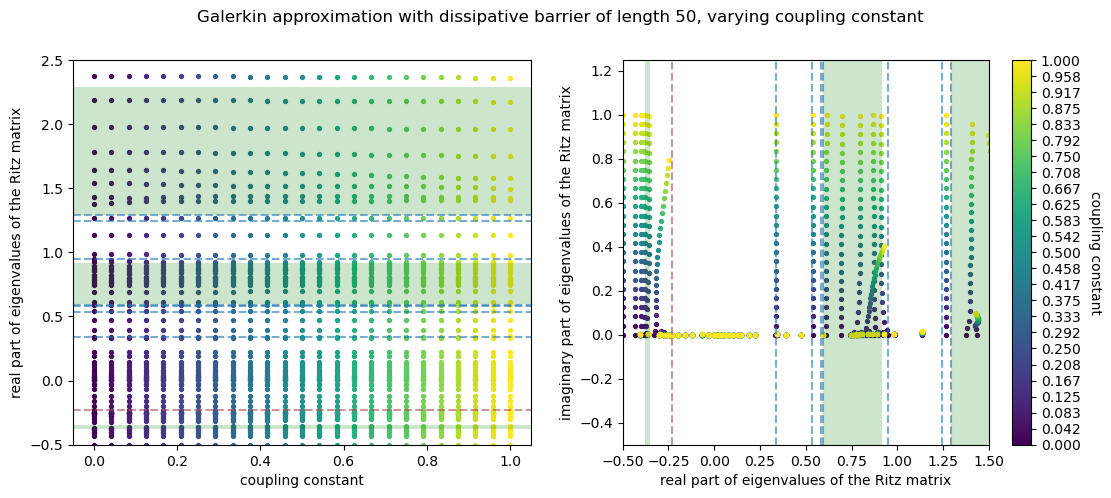

In [73]:
plot(rusl, title="Galerkin approximation with dissipative barrier of length 50, varying coupling constant")

In [57]:
rusl_dbm = {}
for i in tqdm(np.linspace(0, 1, 10)):
    rusl_dbm[i] = sturm_liouville_halfline(potential, 120, 250, alpha=np.pi/8, dbm=(lambda x: i*(x<=75)))

  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [03:46<00:00, 22.67s/it]


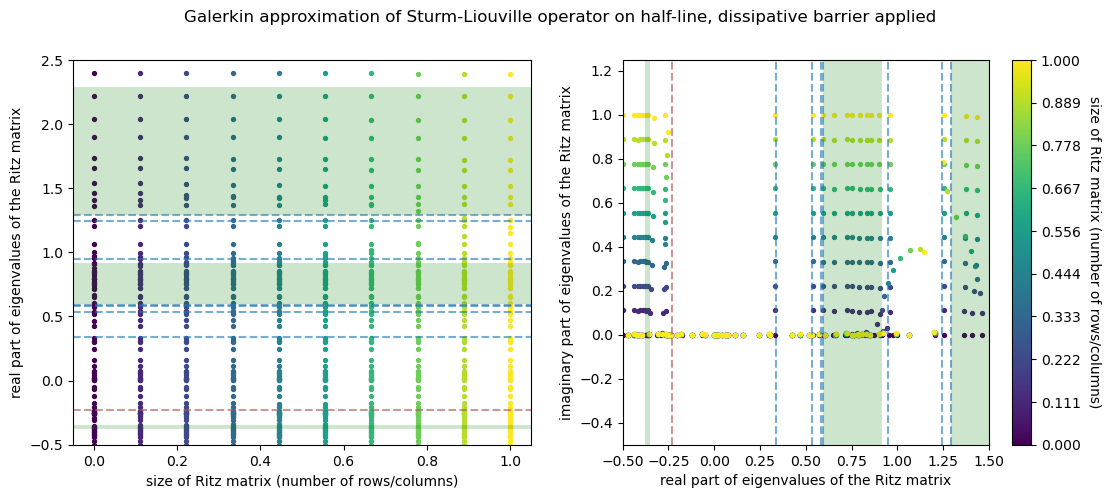

In [58]:
plot(rusl_dbm, title="Galerkin approximation of Sturm-Liouville operator on half-line, dissipative barrier applied")

In [7]:
rusl_eigpairs = sturm_liouville_halfline(potential, 120, 250, alpha=np.pi/8, dbm=(lambda x: x<=100), returns='vectors')

In [81]:
from specpol.common import laguerre, lagdiff
import scipy.integrate as spint
import mpmath as mp

def disc_eigfunc(vec):
    return lambda x: sum(weight * mp.laguerre(i, 0, x) * np.exp(-x/2) for i, weight in enumerate(vec, start=0))

def delta_eigfunc(vec):
    def eigfunc(x):
        return sum(
            weight * np.exp(-x/2)
                   * (mp.laguerre(i-2, 2, x)
                      - mp.laguerre(i-1, 1, x)
                      + 1/4 * mp.laguerre(i, 0, x))
                for i, weight in enumerate(vec, start=0))
    return eigfunc

def residual(vec, lda):
    eigfn = disc_eigfunc(vec)
    eigdf = delta_eigfunc(vec)

    norm = spint.quad(lambda x: np.abs(eigfn(x))**2, 0, 200, limit=500, epsabs=1e-11, epsrel=1e-29)[0]

    def lu(x):
        return np.abs((-eigdf(x) + (potential(x) - lda) * eigfn(x)) / norm)**2

    plt.plot(np.linspace(0.1, 500, 1500), [complex(lu(x)).real for x in np.linspace(0, 500, 1500)])
    plt.show()

    res = spint.quad(lu, 0.1, 200, limit=500, epsabs=1e-11, epsrel=1e-29)[0]
    return res**(1/2)

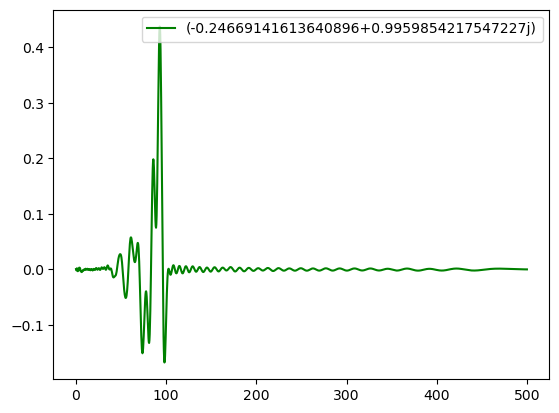

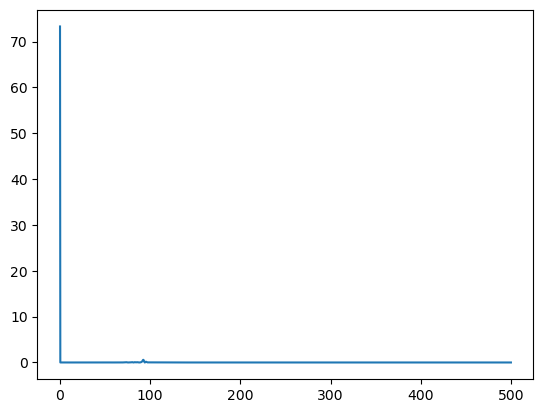

1.4627589493284214

In [82]:
special_vals = rusl_eigpairs.filter(lambda x: x.real < -0.22 and x.real > -0.25 and x.imag > 0.95)

myval, myvec = list(special_vals.data.items())[0]
eigfn = disc_eigfunc(myvec)
plt.plot(np.linspace(0, 500, 1500), [complex(eigfn(x)).real for x in np.linspace(0, 500, 1500)], label=f'{myval}', color='green')
plt.legend()
plt.show()

residual(myvec.real, myval.real)

In [77]:
eigdf = delta_eigfunc(myvec.real)
mp.mp.prec= 500
eigdf(0)

mpf('-8.2697775053407296724357843607788876028052982292138040065765380859375')

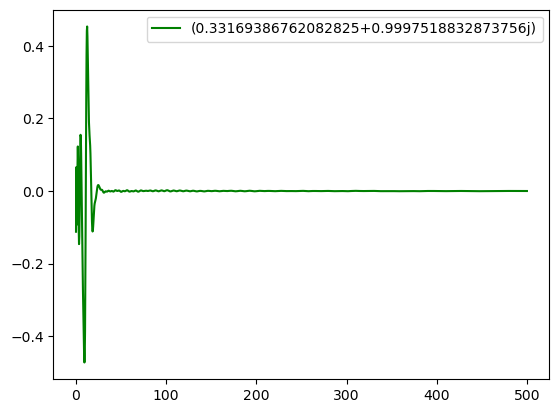

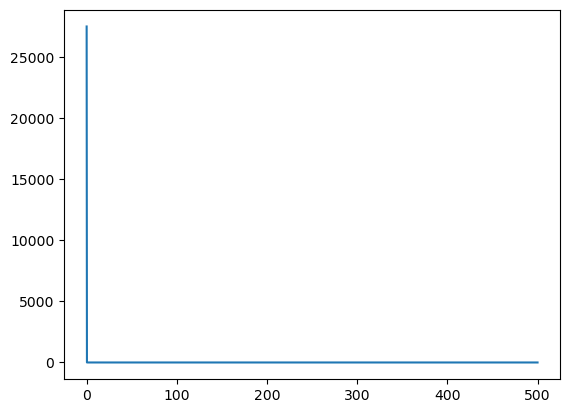

18.360555719098173

In [124]:
safe_val = rusl_eigpairs.filter(lambda x: x.real < 0.5 and x.real > 0.25 and x.imag > 0.95)
sval, svec = list(safe_val.data.items())[0]
eigfn = disc_eigfunc(svec)
plt.plot(np.linspace(0, 500, 1500), [complex(eigfn(x)).real for x in np.linspace(0, 500, 1500)], label=f'{sval}', color='green')
plt.legend()
plt.show()

residual(svec.real, sval.real)

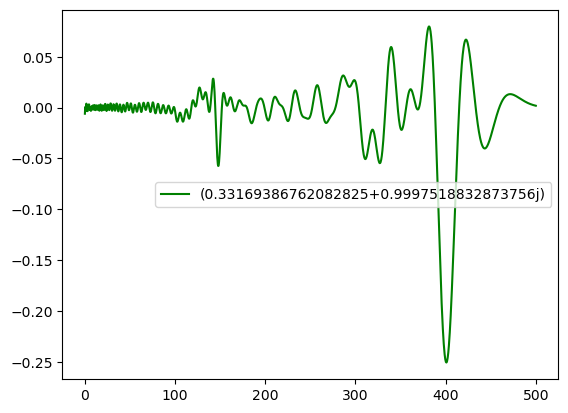

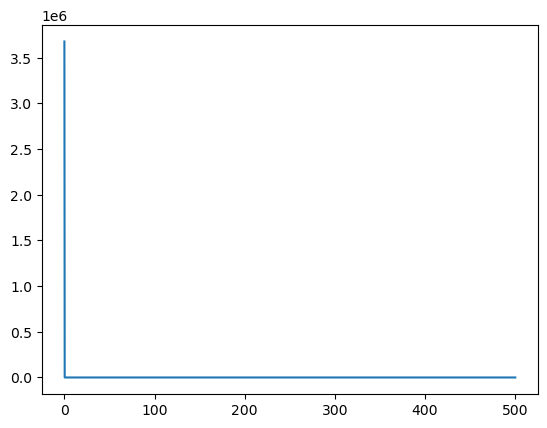

/tmp/ipykernel_5799/2151862035.py:30: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  res = spint.quad(lu, 0, 200, limit=500, epsabs=1e-11, epsrel=1e-29)[0]


197.2244657639962

In [125]:
poll_val = rusl_eigpairs.filter(lambda x: x.real < 0.25 and x.real > 0)
pval, pvec = list(poll_val.data.items())[0]
eigfn = disc_eigfunc(pvec)
plt.plot(np.linspace(0, 500, 1500), [complex(eigfn(x)).real for x in np.linspace(0, 500, 1500)], label=f'{pval}', color='green')
plt.legend()
plt.show()

residual(pvec.real, pval.real)